$\textit{Computational Finance - 0}$
### The daily log returns are not normally distributed ! 
The normal distribution under-estimates very large daily log returns. 
Let's verify that on META historical daily log returns.

In [28]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [29]:
GetFacebookInformation = yf.Ticker("META")
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y,
# 2y, 5y, 10y and ytd.
METAdf = GetFacebookInformation.history(period="10y")
METAdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-24 00:00:00-04:00,77.865548,78.383991,77.277323,78.304230,30680000,0.0,0.0
2014-09-25 00:00:00-04:00,78.364052,78.703035,76.898464,76.988197,37533000,0.0,0.0
2014-09-26 00:00:00-04:00,77.357087,78.603335,77.097873,78.553490,28872000,0.0,0.0
2014-09-29 00:00:00-04:00,77.885500,78.962252,77.676131,78.762856,34031000,0.0,0.0
2014-09-30 00:00:00-04:00,79.111801,79.470721,78.364053,78.802734,35899000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,537.599976,542.099976,530.570007,536.320007,11690800,0.0,0.0
2024-09-18 00:00:00-04:00,537.070007,544.200012,533.900024,537.950012,10323500,0.0,0.0
2024-09-19 00:00:00-04:00,550.000000,562.070007,546.520020,559.099976,15647000,0.0,0.0


In [30]:
# Daily log(Close) :
METAdf["log(St)"] = np.log(METAdf.Close)
# Daily log(Open) :
METAdf["log(S0)"] = np.log(METAdf.Open)
# Daily log returns :
METAdf["LogReturns"] = METAdf["log(St)"] - METAdf["log(S0)"]
METAdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log(St),log(S0),LogReturns
Date,,,,,,,,,,
2014-09-24 00:00:00-04:00,77.865548,78.383991,77.277323,78.304230,30680000,0.0,0.0,4.360602,4.354984,0.005618
2014-09-25 00:00:00-04:00,78.364052,78.703035,76.898464,76.988197,37533000,0.0,0.0,4.343652,4.361365,-0.017713
2014-09-26 00:00:00-04:00,77.357087,78.603335,77.097873,78.553490,28872000,0.0,0.0,4.363780,4.348432,0.015348
2014-09-29 00:00:00-04:00,77.885500,78.962252,77.676131,78.762856,34031000,0.0,0.0,4.366442,4.355240,0.011202
2014-09-30 00:00:00-04:00,79.111801,79.470721,78.364053,78.802734,35899000,0.0,0.0,4.366948,4.370862,-0.003914
...,...,...,...,...,...,...,...,...,...,...
2024-09-17 00:00:00-04:00,537.599976,542.099976,530.570007,536.320007,11690800,0.0,0.0,6.284731,6.287115,-0.002384
2024-09-18 00:00:00-04:00,537.070007,544.200012,533.900024,537.950012,10323500,0.0,0.0,6.287766,6.286128,0.001637
2024-09-19 00:00:00-04:00,550.000000,562.070007,546.520020,559.099976,15647000,0.0,0.0,6.326328,6.309918,0.016410


In [31]:
logreturns = METAdf.LogReturns.values
logreturns

array([ 0.00561802, -0.01771317,  0.01534759, ...,  0.01641003,
        0.00240777, -0.00897789])

In [32]:
mean = logreturns.mean()
std = logreturns.std()

variance = logreturns.var()
dt = 1/252
sigma = np.sqrt(variance / dt)
mu = mean / dt + sigma ** 2 / 2
mu, sigma, mean, std

(0.18130902969345195,
 0.26319038283061347,
 0.0005820414320880535,
 0.016579435724611596)

In [33]:
x = np.linspace(-0.1, 0.1, 1000)
y = norm.pdf(x, mean, std)

In [34]:
# best fit of data
(mu, sigma) = norm.fit(logreturns)
mu, sigma # Equivalent to mean, std

(0.0005820414320880535, 0.016579435724611596)

In [35]:
y_fitted = norm.pdf(x, mu, sigma)

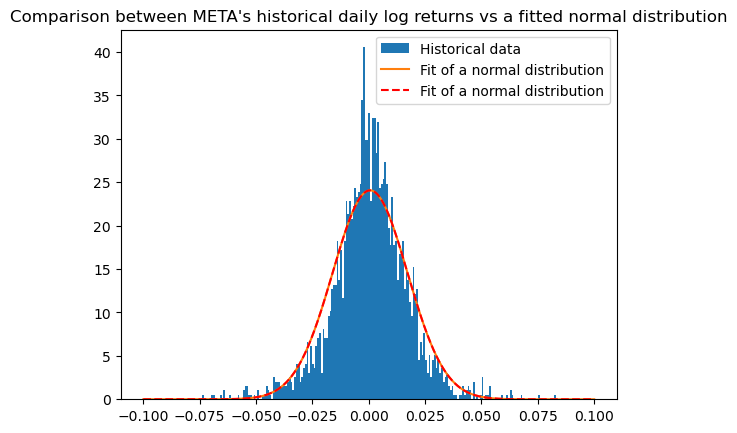

In [38]:
plt.title("Comparison between META's historical daily log returns vs a fitted normal distribution")
plt.hist(logreturns, bins=200, density=True, label = "Historical data")
plt.plot(x, y, label = "Fit of a normal distribution")
plt.plot(x, y_fitted, 'r--', label = "Fit of a normal distribution")
plt.legend()
plt.show()